# 1. Introduction
## Purpose of this notebook
Analyze customer shopping behavior and study **seasonal trend differences**

## Data Summary
- [Here](https://www.kaggle.com/datasets/bhadramohit/customer-shopping-latest-trends-dataset) is the data I used for this notebook.
> 
The dataset offers a comprehensive view of consumer shopping trends, aiming to uncover patterns and behaviors in retail purchasing. It contains detailed transactional data across various product categories, customer demographics, and purchase channels. Key features may include
:
- The data set consists of 3,900 rows × 19 columns.
- Description of each column
|    | Column Name              |   Missing Values | Data Type   | Unique Values   |
|---:|:-------------------------|-----------------:|:------------|:----------------|
|  0 | Customer ID              |                0 | int64       | N/A             |
|  1 | Age                      |                0 | int64       | N/A             |
|  2 | Gender                   |                0 | object      | 2               |
|  3 | Item Purchased           |                0 | object      | 25              |
|  4 | Category                 |                0 | object      | 4               |
|  5 | Purchase Amount (USD)    |                0 | int64       | N/A             |
|  6 | Location                 |                0 | object      | 50              |
|  7 | Size                     |                0 | object      | 4               |
|  8 | Color                    |                0 | object      | 25              |
|  9 | Season                   |                0 | object      | 4               |
| 10 | Review Rating            |                0 | float64     | N/A             |
| 11 | Subscription Status      |                0 | object      | 2               |
| 12 | Payment Method           |                0 | object      | 6               |
| 13 | Shipping Type            |                0 | object      | 6               |
| 14 | Discount Applied         |                0 | object      | 2               |
| 15 | Promo Code Used          |                0 | object      | 2               |
| 16 | Previous Purchases       |                0 | int64       | N/A             |
| 17 | Preferred Payment Method |                0 | object      | 6               |
| 18 | Frequency of Purchases   |                0 | object      | 7               |

In [2]:
from tabulate import tabulate
import pandas as pd

df = pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")

# 列の概要を記載するリストを作成
summary = []
for col in df.columns:
    summary.append({
        "Column Name": col,
        "Missing Values": df[col].isnull().sum(),
        "Data Type": df[col].dtype,
        "Unique Values": df[col].nunique() if df[col].dtype == 'object' else "N/A"
    })

# 概要をデータフレーム化
summary_df = pd.DataFrame(summary)

# Markdown形式に変換
markdown_table = tabulate(summary_df, headers='keys', tablefmt='pipe')

# 出力
print(markdown_table)

|    | Column Name              |   Missing Values | Data Type   | Unique Values   |
|---:|:-------------------------|-----------------:|:------------|:----------------|
|  0 | Customer ID              |                0 | int64       | N/A             |
|  1 | Age                      |                0 | int64       | N/A             |
|  2 | Gender                   |                0 | object      | 2               |
|  3 | Item Purchased           |                0 | object      | 25              |
|  4 | Category                 |                0 | object      | 4               |
|  5 | Purchase Amount (USD)    |                0 | int64       | N/A             |
|  6 | Location                 |                0 | object      | 50              |
|  7 | Size                     |                0 | object      | 4               |
|  8 | Color                    |                0 | object      | 25              |
|  9 | Season                   |                0 | object      

# 2. data loading and overview

## Data Import

In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


## Summary display of data

In [4]:
print("Information of the data")
display(df.info())

print("Description")
display(df.describe(include="all"))

print("Head")
display(df.head())

Information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null

None

Description


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Credit Card,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,696,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


Head


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


There are no missing values, no notable outliers, and no type conversions required.

# 3. Basic analysis

## 3.1 Analysis of customers

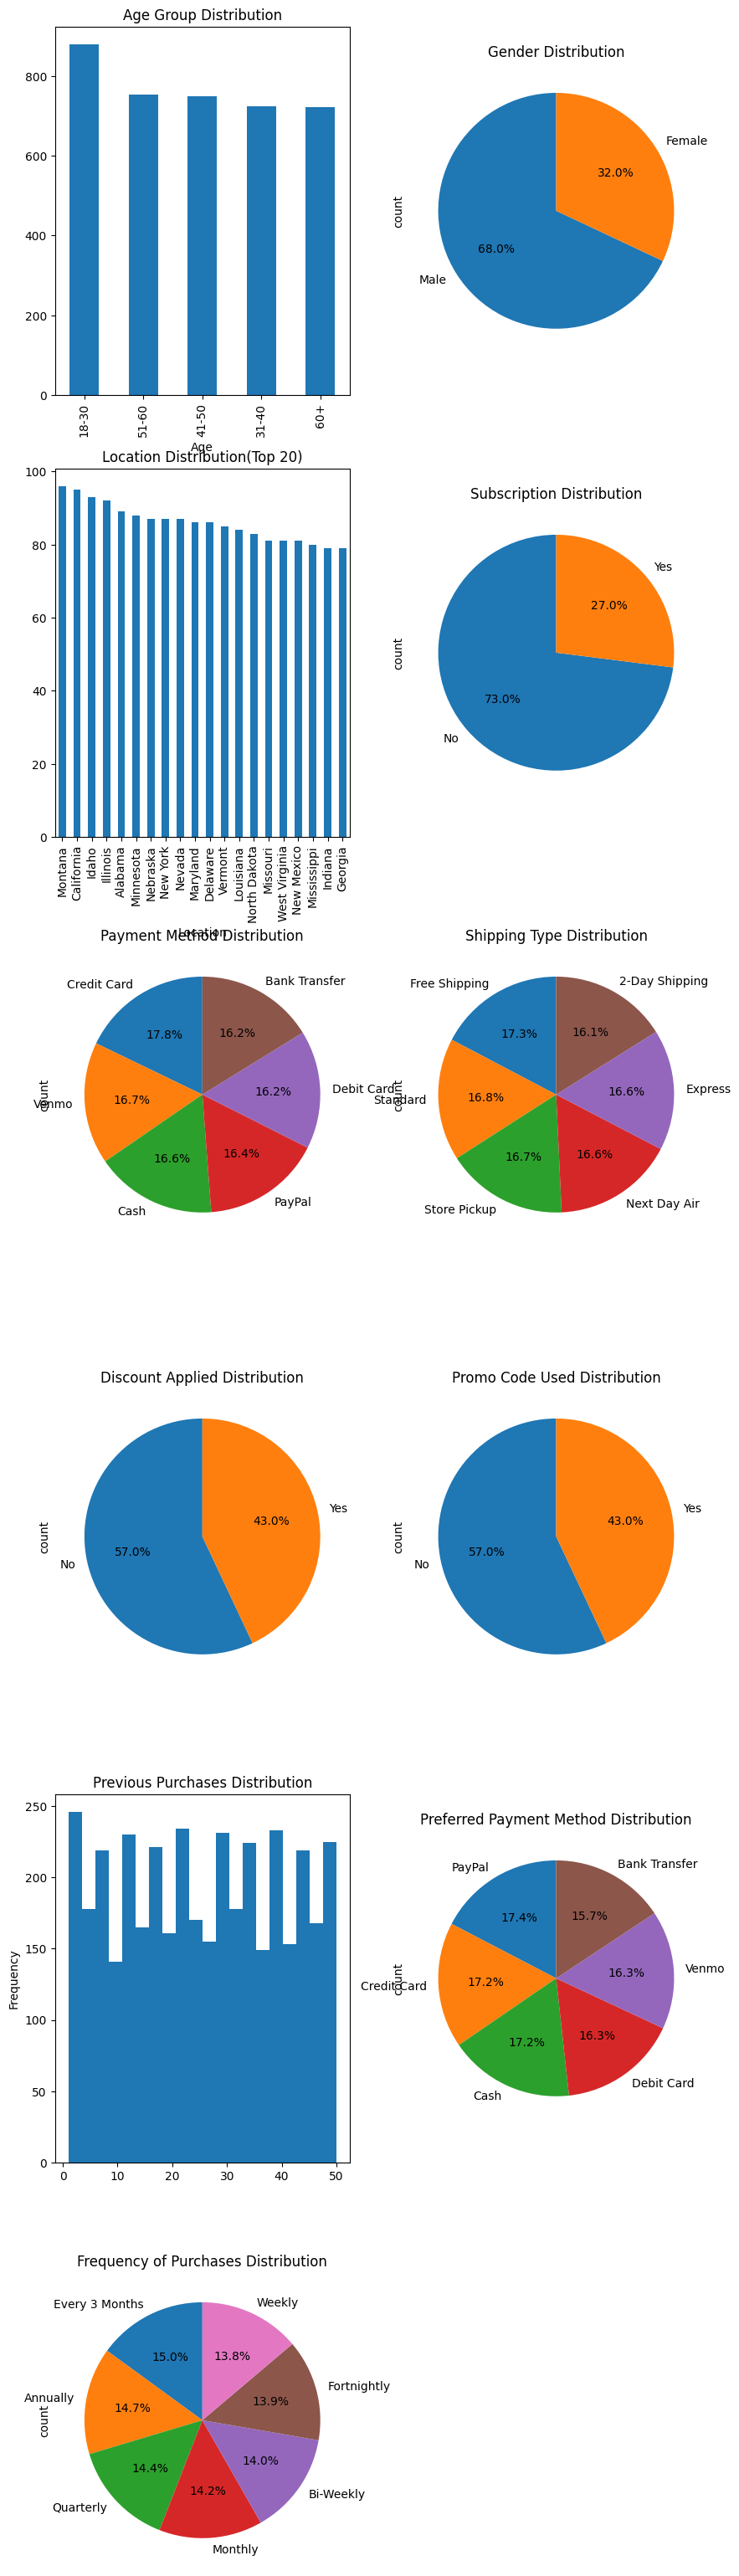

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,40))

# Age
plt.subplot(6,2,1)
age_groups = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])
age_distribution = age_groups.value_counts()
age_distribution.plot(kind='bar', title='Age Group Distribution')

# Gender
plt.subplot(6,2,2)
gender_distribution = df['Gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution',startangle=90)

# Location
plt.subplot(6,2,3)
Location_distribution = df['Location'].value_counts()[:20]
Location_distribution.plot(kind='bar', title='Location Distribution(Top 20)')

#Subscription Status
plt.subplot(6,2,4)
subscription_distribution = df['Subscription Status'].value_counts()
subscription_distribution.plot(kind='pie', autopct='%1.1f%%', title='Subscription Distribution',startangle=90)

#Payment Method
plt.subplot(6,2,5)
Payment_distribution = df['Payment Method'].value_counts()
Payment_distribution.plot(kind='pie', autopct='%1.1f%%', title='Payment Method Distribution',startangle=90)

#Shipping Type
plt.subplot(6,2,6)
Shipping_distribution = df['Shipping Type'].value_counts()
Shipping_distribution.plot(kind='pie', autopct='%1.1f%%', title='Shipping Type Distribution',startangle=90)

#Discount Applied
plt.subplot(6,2,7)
Discount_distribution = df['Discount Applied'].value_counts()
Discount_distribution.plot(kind='pie', autopct='%1.1f%%', title='Discount Applied Distribution',startangle=90)

#Promo Code Used
plt.subplot(6,2,8)
PromoCode_distribution = df['Promo Code Used'].value_counts()
PromoCode_distribution.plot(kind='pie', autopct='%1.1f%%', title='Promo Code Used Distribution',startangle=90)

#Previous Purchases
plt.subplot(6,2,9)
PreviousPurchases_distribution = df['Previous Purchases']
PreviousPurchases_distribution.plot(kind='hist', bins=20, title='Previous Purchases Distribution')

#Preferred Payment Method
plt.subplot(6,2,10)
PreferredPaymentMethod_distribution = df['Preferred Payment Method'].value_counts()
PreferredPaymentMethod_distribution.plot(kind='pie', autopct='%1.1f%%', title='Preferred Payment Method Distribution',startangle=90)

#Frequency of Purchases
plt.subplot(6,2,11)
FrequencyOfPurchases_distribution = df['Frequency of Purchases'].value_counts()
FrequencyOfPurchases_distribution.plot(kind='pie', autopct='%1.1f%%', title='Frequency of Purchases Distribution',startangle=90)

plt.show()

In [6]:
len(df[df["Discount Applied"]!=df["Promo Code Used"]])

0

- The only customer information with significant percentage bias is Gender and Subscription Status.
- Discount Applied and Promo Code Used are the same, and all discounts are due to promotions.

## 3.2 Analysis of production

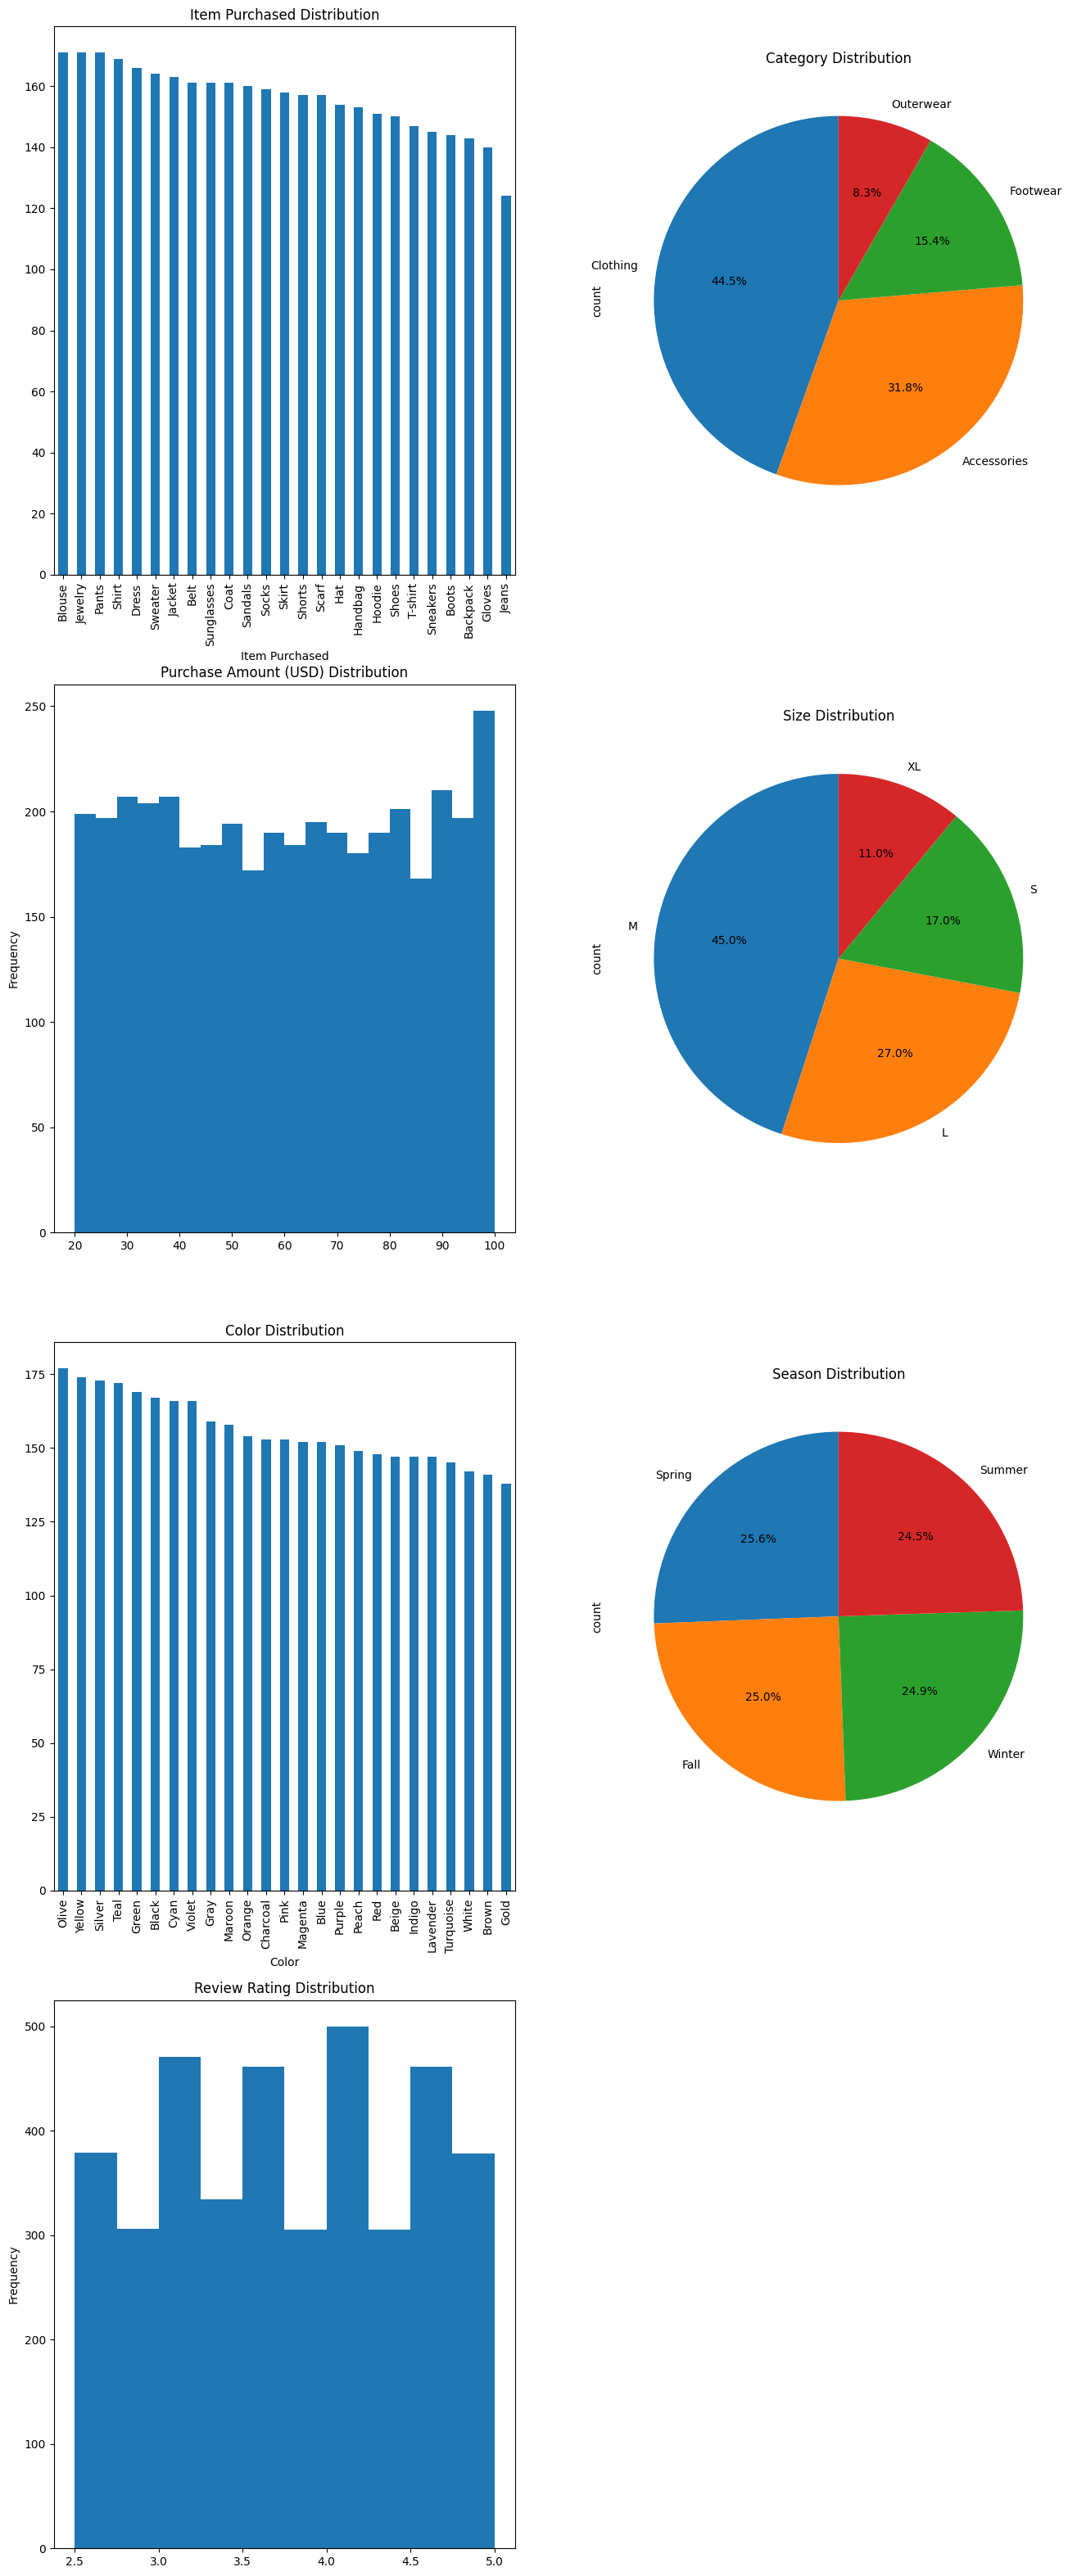

In [7]:
plt.figure(figsize=(16,40))

# Item Purchased
plt.subplot(4,2,1)
ItemPurchased_distribution = df['Item Purchased'].value_counts()
ItemPurchased_distribution.plot(kind='bar', title='Item Purchased Distribution')

# Category
plt.subplot(4,2,2)
Category_distribution = df['Category'].value_counts()
Category_distribution.plot(kind='pie', autopct='%1.1f%%', title='Category Distribution',startangle=90)

# Purchase Amount (USD)
plt.subplot(4,2,3)
PurchaseAmount_distribution = df['Purchase Amount (USD)']
PurchaseAmount_distribution.plot(kind='hist', bins=20, title='Purchase Amount (USD) Distribution')

# Size
plt.subplot(4,2,4)
Size_distribution = df['Size'].value_counts()
Size_distribution.plot(kind='pie', autopct='%1.1f%%', title='Size Distribution',startangle=90)

# Color
plt.subplot(4,2,5)
Color_distribution = df['Color'].value_counts()
Color_distribution.plot(kind='bar', title='Color Distribution',)

# Season
plt.subplot(4,2,6)
Season_distribution = df['Season'].value_counts()
Season_distribution.plot(kind='pie', autopct='%1.1f%%', title='Season Distribution',startangle=90)

# Review Rating
plt.subplot(4,2,7)
ReviewRating_distribution = df['Review Rating']
ReviewRating_distribution.plot(kind='hist', title='Review Rating Distribution')

plt.show()

- Clothing items were the most common at 44.5%.- 
Most people buy size .
- 
Regarding Purchase Amount (USD), the slightly higher number of 100 may be due to the fact that items longer than 100 were combined into 100 (hypothesis).

# 4. Seasonal trend analysis

## 4.1 Seasonal Sales Comparison

In [8]:
seasonal_sales = df.groupby("Season").agg({"Purchase Amount (USD)":["count","sum","mean"]})
seasonal_sales

Purchase Amount (USD)                  
                       count    sum       mean
Season                                        
Fall                     975  60018  61.556923
Spring                   999  58679  58.737738
Summer                   955  55777  58.405236
Winter                   971  58607  60.357364

Since the maximum difference is 3$, we found that seasonal sales remain the same.

## 4.2 Season × Category,Item Purchased

In [9]:
season_category = df.groupby(['Season', 'Category'])['Customer ID'].count().unstack()
season_category_percentage = season_category.div(season_category.sum(axis=1), axis=0) * 100
display(season_category_percentage)


season_item_sales = df.groupby(['Season', 'Item Purchased'])['Customer ID'].count().unstack()
top_10_items_df = pd.DataFrame()
for season in season_item_sales.index:
    top_10_items_season = season_item_sales.loc[season].sort_values(ascending=False).head(10)
    top_10_items_df[season] = top_10_items_season.keys()
top_10_items_df.index = range(1, 11) 
display(top_10_items_df)


Category,Accessories,Clothing,Footwear,Outerwear
Season,,,,
Fall,33.230769,43.794872,13.948718,9.025641
Spring,30.130130,45.445445,16.316316,8.108108
Summer,32.670157,42.722513,16.753927,7.853403
Winter,31.204943,46.138002,14.418126,8.238929


,Fall,Spring,Summer,Winter
1,Jacket,Sweater,Pants,Sunglasses
2,Hat,Shorts,Jewelry,Pants
3,Handbag,Blouse,Dress,Shirt
4,Skirt,Coat,Shoes,Hoodie
5,Sandals,Skirt,Backpack,Jewelry
6,Socks,Sandals,Scarf,Sweater
7,Blouse,Dress,Blouse,Jacket
8,Sweater,Jewelry,Socks,Belt
9,Belt,Shirt,Coat,T-shirt
10,Scarf,Gloves,Sandals,Hat


To my surprise, in winter, **sunglasses** sell better than gloves and jackets.

## 4.3 Season × Color

In [10]:
season_colors = df.groupby(['Season', 'Color'])['Customer ID'].count().unstack()
top_colors_df = pd.DataFrame()
for season in season_colors.index:
    top_color_season = season_colors.loc[season].sort_values(ascending=False).head(10)
    top_colors_df[season] = top_color_season.keys()
top_colors_df.index = range(1, 11) 
display(top_colors_df)

,Fall,Spring,Summer,Winter
1,Yellow,Olive,Silver,Green
2,Magenta,Gray,Teal,Yellow
3,Olive,Teal,Blue,Pink
4,Orange,Violet,Green,Peach
5,Violet,Pink,White,Maroon
6,Gray,Black,Cyan,Charcoal
7,Cyan,Purple,Black,Olive
8,Red,Charcoal,Violet,Turquoise
9,Peach,Cyan,Gray,Indigo
10,Black,Turquoise,Lavender,Brown


- In winter and fall, products in bright colors such as pink and yellow sell well, while products in dark colors such as black and silver sell well in spring and summer.
- Olive-colored productions sell well except in summer.

## 4.4 Season × Discount

In [12]:
# Yes:1,No:0
df['Discount Applied (Numeric)'] = df['Discount Applied'].map({'Yes': 1, 'No': 0})
season_discount = df.groupby(['Season'])['Discount Applied (Numeric)'].mean() * 100

display(season_discount)

Season
Fall      40.717949
Spring    44.044044
Summer    44.293194
Winter    42.945417
Name: Discount Applied (Numeric), dtype: float64

- The more discounted seasons have smaller total purchases (based on 4.1).

# 5. Conclusion and Next Steps
This data set was analyzed to determine seasonal trends.

## Results
- No significant differences in purchase amounts or discount usage appear between seasons.
- No significant differences in categories between seasons.
- Cold-colored products sell well in spring and summer, while warm-colored products sell well in fall and winter.
- Olive colors sell well except in summer.

## Next Action
- Collect multiple data with the same customer ID.
- Obtain (or provide) data that has the date and time of purchase, not the season.
- Recommend products to customers in the appropriate color for each season.

Translated with DeepL.com (free version)